## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
np.random.seed(5)
import warnings
warnings.filterwarnings("ignore")

/tmp/ipykernel_7006/4043983998.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Create Dataset

Creating the data

In [2]:
x = []
palindromes = []
for i in range(1024):
    binary_string = format(i, '010b')
    x.append(binary_string)
    if binary_string == binary_string[::-1]:
        palindromes.append(binary_string)
x = np.array(x)
palindromes = np.array(palindromes)


Shuffling and Concatenating the Data

In [12]:
np.random.shuffle(palindromes)
biasing_factor = 0
for i in range(biasing_factor):
    x = np.concatenate((x, palindromes))
print(len(x))

1024


Creating the test and train split

In [5]:
#Creating the labels for data
y = []
for binary_string in x:
    y.append(binary_string == binary_string[::-1])
y = np.array(y)
permutation_index = np.random.permutation(len(x))
x = x[permutation_index]
y = y[permutation_index]
#Creating the test, train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Creating the activation and loss functions

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def relu(x):
    return np.maximum(0, x)

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Training with MSE loss

Loading the weights from 4-hidden-neurons models befor training. See readme.md

In [17]:
np.random.seed(30)
LEARNING_RATE = 1e-3
NUM_EPOCHS = 10000
input_size = 10
hidden_layer_size = 2
output_size = 1

weights_ih = np.load('weights/weights_ih2.npy')
# weights_ih = np.random.rand(input_size, hidden_layer_size)
weights_ho = np.random.rand(hidden_layer_size, output_size)
bias_ih = np.load('weights/bias_ih2.npy')
# bias_ih = np.random.rand(1, hidden_layer_size)
bias_ho = np.random.rand(1, output_size)

Training the model

Epoch 0 : loss [22.62812862]
Epoch 1 : loss [13.60055655]
Epoch 2 : loss [13.44266617]
Epoch 3 : loss [13.38322696]
Epoch 4 : loss [13.34912633]
Epoch 5 : loss [13.32435839]
Epoch 6 : loss [13.30342031]
Epoch 7 : loss [13.28389374]
Epoch 8 : loss [13.26451931]
Epoch 9 : loss [13.24455111]
Epoch 10 : loss [13.22350461]
Epoch 11 : loss [13.20104922]
Epoch 12 : loss [13.17695998]
Epoch 13 : loss [13.15109209]
Epoch 14 : loss [13.12335921]
Epoch 15 : loss [13.09370398]
Epoch 16 : loss [13.06205556]
Epoch 17 : loss [13.02827613]
Epoch 18 : loss [12.99210406]
Epoch 19 : loss [12.95310284]
Epoch 20 : loss [12.91062073]
Epoch 21 : loss [12.86375862]
Epoch 22 : loss [12.81133725]
Epoch 23 : loss [12.75185284]
Epoch 24 : loss [12.68341094]
Epoch 25 : loss [12.60363256]
Epoch 26 : loss [12.50953271]
Epoch 27 : loss [12.39738432]
Epoch 28 : loss [12.26260783]
Epoch 29 : loss [12.09978303]
Epoch 30 : loss [11.90297948]
Epoch 31 : loss [11.66673078]
Epoch 32 : loss [11.38800292]
Epoch 33 : loss [11.

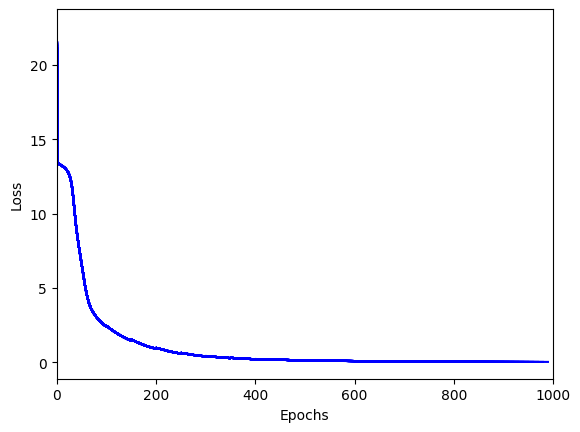

In [18]:
LEARNING_RATE = 1
NUM_EPOCHS = 1000
BATCH_SIZE = 4
cost = []
initial_lr = LEARNING_RATE
lr_schedule = lambda epoch: initial_lr * 1.15 ** (epoch // 50)

for epoch in range(NUM_EPOCHS):
    tot_loss = 0
    
    current_lr = lr_schedule(epoch)

    for batch_start in range(0, len(x_train), BATCH_SIZE):
        batch_end = batch_start + BATCH_SIZE
        x_batch = x_train[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]

        batch_gradients_ih = np.zeros_like(weights_ih)
        batch_gradients_ho = np.zeros_like(weights_ho)
        batch_bias_ih = np.zeros_like(bias_ih)
        batch_bias_ho = np.zeros_like(bias_ho)

        for i, s in enumerate(x_batch):
            inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))

            hlayer_logits = np.dot(inp, weights_ih) + bias_ih
            hlayer_output = sigmoid(hlayer_logits)

            final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
            final_output = sigmoid(final_logits)

            tot_loss += 0.5 * (abs(final_output[0] - y_batch[i])) ** 2

            output_delta = (y_batch[i] - final_output[0]) * final_output * (1 - final_output[0])
            batch_bias_ho += output_delta
            batch_bias_ih += (output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))
            batch_gradients_ho += hlayer_output.T.dot(output_delta)
            batch_gradients_ih += inp.T.dot(output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))

        # Update weights and biases after the batch
        bias_ho += current_lr * (batch_bias_ho / BATCH_SIZE)
        bias_ih += current_lr * (batch_bias_ih / BATCH_SIZE)
        weights_ho += current_lr * (batch_gradients_ho / BATCH_SIZE)
        weights_ih += current_lr * (batch_gradients_ih / BATCH_SIZE)

    cost.append(tot_loss)
    print(f'Epoch {epoch} : loss {tot_loss}')
    if epoch % 10 == 0:
        plt.plot([pl for pl in range(epoch + 1)], cost, 'b')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.xlim(0, NUM_EPOCHS)
        plt.savefig('train_mse.png')



# Training with Cross entropy loss

Loading the weights from 4-hidden-neurons models befor training. See readme.md

In [27]:
np.random.seed(30)
LEARNING_RATE = 1e-3
NUM_EPOCHS = 10000

input_size = 10
hidden_layer_size = 2
output_size = 1

weights_ih = np.load('weights/weights_ih2.npy')
# weights_ih = np.random.rand(input_size, hidden_layer_size)
weights_ho = np.random.rand(hidden_layer_size, output_size)
bias_ih = np.load('weights/bias_ih2.npy')
# bias_ih = np.random.rand(1, hidden_layer_size)
bias_ho = np.random.rand(1, output_size)

Training the model

Epoch 0 : loss 230.46463531519606
Epoch 1 : loss 132.02134142322495
Epoch 2 : loss 127.63459167385578
Epoch 3 : loss 124.45649275208471
Epoch 4 : loss 121.74949408769157
Epoch 5 : loss 119.3578001072524
Epoch 6 : loss 117.07733198512867
Epoch 7 : loss 114.70364893348558
Epoch 8 : loss 112.09562285772914
Epoch 9 : loss 109.19762055999993
Epoch 10 : loss 106.02872993491005
Epoch 11 : loss 102.65635020600755
Epoch 12 : loss 99.16891107726987
Epoch 13 : loss 95.6559328460985
Epoch 14 : loss 92.19670358469895
Epoch 15 : loss 88.85525022526913
Epoch 16 : loss 85.67894386905888
Epoch 17 : loss 82.69901775787899
Epoch 18 : loss 79.9321438865016
Epoch 19 : loss 77.38265925386999
Epoch 20 : loss 75.04516569495526
Epoch 21 : loss 72.90723526934376
Epoch 22 : loss 70.95196178432131
Epoch 23 : loss 69.160153485331
Epoch 24 : loss 67.51205166649241
Epoch 25 : loss 65.98855330805529
Epoch 26 : loss 64.57198678485352
Epoch 27 : loss 63.24652817716121
Epoch 28 : loss 61.99835531443721
Epoch 29 : loss 6

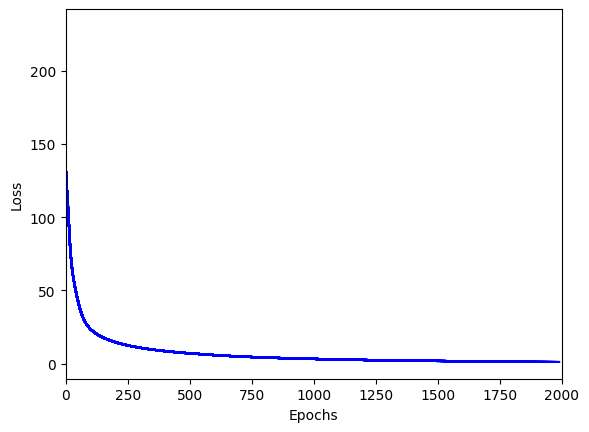

In [28]:
LEARNING_RATE = 0.1
NUM_EPOCHS = 2000
BATCH_SIZE = 4
cost = []
initial_lr = LEARNING_RATE
lr_schedule = lambda epoch: initial_lr * 1.15 ** (epoch // 500)

for epoch in range(NUM_EPOCHS):
    tot_loss = 0

    current_lr = lr_schedule(epoch)

    for batch_start in range(0, len(x_train), BATCH_SIZE):
        batch_end = batch_start + BATCH_SIZE
        x_batch = x_train[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]

        batch_gradients_ih = np.zeros_like(weights_ih)
        batch_gradients_ho = np.zeros_like(weights_ho)
        batch_bias_ih = np.zeros_like(bias_ih)
        batch_bias_ho = np.zeros_like(bias_ho)

        for i, s in enumerate(x_batch):
            inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))

            hlayer_logits = np.dot(inp, weights_ih) + bias_ih
            hlayer_output = sigmoid(hlayer_logits)

            final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
            final_output = sigmoid(final_logits)

            tot_loss += cross_entropy_loss(y_batch[i], final_output[0])

            output_delta = final_output - y_batch[i]
            batch_bias_ho += output_delta
            batch_bias_ih += (output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))
            batch_gradients_ho += hlayer_output.T.dot(output_delta)
            batch_gradients_ih += inp.T.dot(output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))

        # Update weights and biases after the batch
        bias_ho -= current_lr * (batch_bias_ho / BATCH_SIZE)
        bias_ih -= current_lr * (batch_bias_ih / BATCH_SIZE)
        weights_ho -= current_lr * (batch_gradients_ho / BATCH_SIZE)
        weights_ih -= current_lr * (batch_gradients_ih / BATCH_SIZE)

    cost.append(tot_loss)
    print(f'Epoch {epoch} : loss {tot_loss}')
    if epoch % 10 == 0:
        plt.plot([pl for pl in range(epoch + 1)], cost, 'b')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.xlim(0, NUM_EPOCHS)
        plt.savefig('train_CE.png')

# Testing

Looking at the weights

In [29]:
print('\nweights_ih: \n', weights_ih)
print('\nbias_ih: \n', bias_ih)
print('weights_ho: \n', weights_ho)
print('\nbias_ho: \n', bias_ho)


weights_ih: 
 [[-15.51349067  14.986085  ]
 [-35.42047133  34.07500746]
 [  8.84067297  -8.55287568]
 [-17.71318861  17.01780219]
 [-13.23853822  12.75881868]
 [ 13.25056776 -12.72013593]
 [ 17.73777437 -17.04051622]
 [ -8.75390666   8.42082508]
 [ 35.45592634 -34.09602001]
 [ 15.53186008 -14.96182749]]

bias_ih: 
 [[-1.89485467 -1.71763534]]
weights_ho: 
 [[-24.64330934]
 [-24.56415266]]

bias_ho: 
 [[10.69429094]]


Testing the model on specific inputs(UI also made, see Readme,md)

In [31]:
x_test1 = '1010110101'
x_test2 = '1000011111'
def test(x):
    inp = np.reshape(np.array([int(char) for char in x]), (1, input_size))
    print('-'*25, '\nInput: \n', inp)
    print('\nLogit 1: \n', np.dot(inp, weights_ih)+ bias_ih)
    print('\nHidden layer 1 Output: \n', sigmoid(np.dot(inp, weights_ih)+ bias_ih))
    print('\nLogit 2: \n', np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho)
    print('\nHidded layer 2 Output: \n', sigmoid(np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho))
    return sigmoid(np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho)

if(test(x_test1)>0.5):
    print("\nPalindrome")
else:
    print("\nNot Palindrome!")

------------------------- 
Input: 
 [[1 0 1 0 1 1 0 1 0 1]]

Logit 1: 
 [[-1.7776894  -1.78674568]]

Hidden layer 1 Output: 
 [[0.14458868 0.14347218]]

Logit 2: 
 [[3.60687492]]

Hidded layer 2 Output: 
 [[0.97358042]]

Palindrome


Saving weights. This will be used in the UI

In [33]:
np.save('new_weights/weights_ih2.npy', weights_ih)
np.save('new_weights/weights_ho2.npy', weights_ho)
np.save('new_weights/bias_ih2', bias_ih)
np.save("new_weights/bias_ho2", bias_ho)


## New Testing

In [34]:
count=0
for i in range(len(x_test)):
    y_p = 1 if test(x_test[i])>0.5 else 0
    if y_test[i]!=y_p:
        count+=1
        print(x_test[i], ' - predicted: ', y_p, ' with prob: ', test(x_test[i]))
print('-------------------------------- Accuracy: ', (len(x_test) - count)/len(x_test), '--------------------------------')

------------------------- 
Input: 
 [[1 0 1 1 1 1 1 0 1 1]]

Logit 1: 
 [[ 42.45672936 -44.32630479]]

Hidden layer 1 Output: 
 [[1.00000000e+00 5.61475003e-20]]

Logit 2: 
 [[-13.9490184]]

Hidded layer 2 Output: 
 [[8.75019842e-07]]
------------------------- 
Input: 
 [[1 1 0 0 1 1 1 1 0 0]]

Logit 1: 
 [[-43.83291941  38.76244873]]

Hidden layer 1 Output: 
 [[9.19612731e-20 1.00000000e+00]]

Logit 2: 
 [[-13.86986172]]

Hidded layer 2 Output: 
 [[9.47098562e-07]]
------------------------- 
Input: 
 [[0 1 1 0 0 0 0 0 1 0]]

Logit 1: 
 [[  6.98127331 -10.29152357]]

Hidden layer 1 Output: 
 [[9.99071743e-01 3.39182450e-05]]

Logit 2: 
 [[-13.92697625]]

Hidded layer 2 Output: 
 [[8.94521281e-07]]
------------------------- 
Input: 
 [[0 1 1 1 0 1 1 1 1 1]]

Logit 1: 
 [[ 27.03438026 -29.57537593]]

Hidden layer 1 Output: 
 [[1.00000000e+00 1.43079506e-13]]

Logit 2: 
 [[-13.9490184]]

Hidded layer 2 Output: 
 [[8.75019842e-07]]
------------------------- 
Input: 
 [[0 1 1 1 1 1 0 1 1 1]

## K-Fold Cross Validation

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def relu(x):
    return np.maximum(0, x)

In [36]:
x = []
palindromes = []
for i in range(1024):
    binary_string = format(i, '010b')
    x.append(binary_string)
    if binary_string == binary_string[::-1]:
        palindromes.append(binary_string)
x = np.array(x)
palindromes = np.array(palindromes)

y = []
for binary_string in x:
    y.append(binary_string == binary_string[::-1])
y = np.array(y)
permutation_index = np.random.permutation(len(x))
x = x[permutation_index]
y = y[permutation_index]

In [44]:
np.random.seed(28)
LEARNING_RATE = 0.1
NUM_EPOCHS = 10000

input_size = 10
hidden_layer_size = 2
output_size = 1
global weights_ih

# weights_ih = np.random.rand(input_size, hidden_layer_size)
weights_ih = np.load('weights/weights_ih2.npy')
weights_ho = np.random.rand(hidden_layer_size, output_size)
# bias_ih = np.random.rand(1, hidden_layer_size)
bias_ih = np.load('weights/bias_ih2.npy')
bias_ho = np.random.rand(1, output_size)

In [45]:
def accuracy_metric(predicted, target):
    if len(target)!=len(predicted):
        raise ValueError("Both predicted and target vectors should be same size!")

    correct = 0
    for i in range(len(target)):
        if target[i] == predicted[i]:
            correct += 1
    return correct / float(len(target)) * 100.0

In [46]:
def train(x_train,y_train, x_val, y_val, lr=1, epochs=1000, batch_size=4):
    global weights_ih, weights_ho, bias_ih, bias_ho
    LEARNING_RATE = lr
    NUM_EPOCHS = epochs
    BATCH_SIZE = batch_size  # Set your desired batch size
    cost = []
    cost_val = []
    initial_lr = LEARNING_RATE
    lr_schedule = lambda epoch: initial_lr * 0.95 ** (epoch // 50)

    for epoch in range(NUM_EPOCHS):
        tot_loss = 0
        tot_loss_valid = 0
        current_lr = lr_schedule(epoch)

        for batch_start in range(0, len(x_train), BATCH_SIZE):
            batch_end = batch_start + BATCH_SIZE
            x_batch = x_train[batch_start:batch_end]
            y_batch = y_train[batch_start:batch_end]

            batch_gradients_ih = np.zeros_like(weights_ih)
            batch_gradients_ho = np.zeros_like(weights_ho)
            batch_bias_ih = np.zeros_like(bias_ih)
            batch_bias_ho = np.zeros_like(bias_ho)

            for i, s in enumerate(x_batch):
                inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))

                hlayer_logits = np.dot(inp, weights_ih) + bias_ih
                hlayer_output = sigmoid(hlayer_logits)

                final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
                final_output = sigmoid(final_logits)

                tot_loss += abs(final_output[0] - y_batch[i])

                output_delta = (y_batch[i] - final_output[0]) * final_output * (1 - final_output[0])
                batch_bias_ho += output_delta
                batch_bias_ih += (output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))
                batch_gradients_ho += hlayer_output.T.dot(output_delta)
                batch_gradients_ih += inp.T.dot(output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))

            # Update weights and biases after the batch
            bias_ho += current_lr * (batch_bias_ho / BATCH_SIZE)
            bias_ih += current_lr * (batch_bias_ih / BATCH_SIZE)
            weights_ho += current_lr * (batch_gradients_ho / BATCH_SIZE)
            weights_ih += current_lr * (batch_gradients_ih / BATCH_SIZE)
        
        cost.append(tot_loss)
        # print(f'Epoch {epoch} : loss {tot_loss}')
        for i, s in enumerate(x_val):
                inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))

                hlayer_logits = np.dot(inp, weights_ih) + bias_ih
                hlayer_output = sigmoid(hlayer_logits)

                final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
                final_output = sigmoid(final_logits)

                tot_loss_valid += abs(final_output[0] - y_val[i])
    cost_val.append(tot_loss_valid)
    print("Done!")
    return cost, cost_val

In [47]:
def k_fold_cross_validation(X:np.ndarray, y:np.ndarray, k_folds:int = 4, epochs_per_fold:int = 250):
        fold_size = len(X) // k_folds
        losses = []
        losses_val = []
        for i in range(k_folds):
            start, end = i * fold_size, (i + 1) * fold_size
            X_test_fold, y_test_fold = X[start:end], y[start:end]
            X_train_fold = np.concatenate([X[:start], X[end:]])
            y_train_fold = np.concatenate([y[:start], y[end:]])
            print(f"Training Fold {i+1}\n")
            loss_train, loss_val = train(X_train_fold, y_train_fold, X_test_fold, y_test_fold, epochs=epochs_per_fold)
            losses.extend(loss_train)
            losses_val.extend(loss_val)
            print("\n"+10*"----"+"\n")

        return losses, losses_val

In [48]:
losses, loss_val = k_fold_cross_validation(x, y, epochs_per_fold = 500)

Training Fold 1

Done!

----------------------------------------

Training Fold 2

Done!

----------------------------------------

Training Fold 3

Done!

----------------------------------------

Training Fold 4

Done!

----------------------------------------



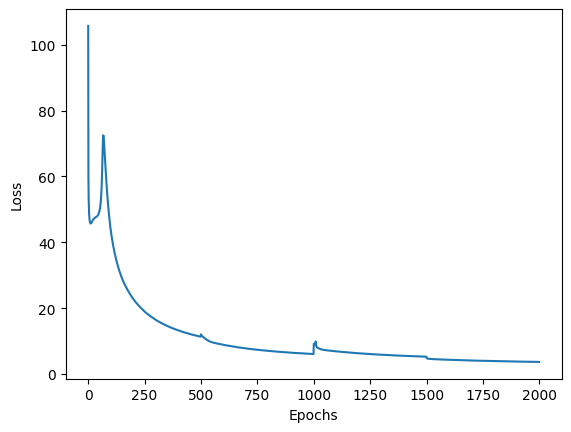

In [49]:
plt.plot( np.arange(0, len(losses)),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

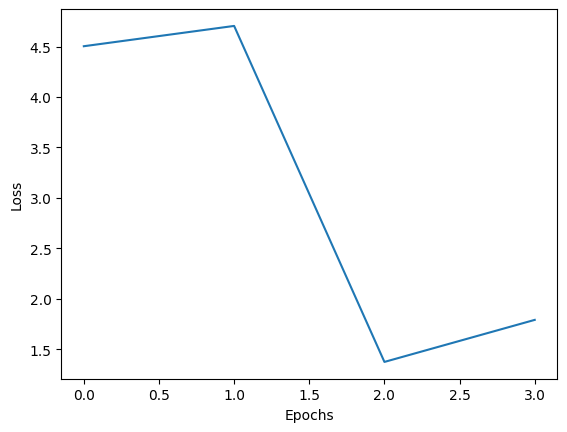

In [51]:
plt.plot( np.arange(0, len(loss_val)),loss_val)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [52]:
def predict(x):
    inp = np.reshape(np.array([int(char) for char in x]), (1, input_size))
    return sigmoid(np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho)

In [53]:
count=0
for i in range(len(x)):
    y_p = 1 if predict(x[i])>0.5 else 0
    if y[i]!=y_p:
        count+=1
        print(x[i], ' - predicted: ', y_p)
print('Accuracy: ', (len(x) - count)/len(x))

Accuracy:  1.0
